In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

In [62]:
data = pd.read_csv('Data/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [64]:
data.drop(columns='Address', inplace=True)

<Axes: >

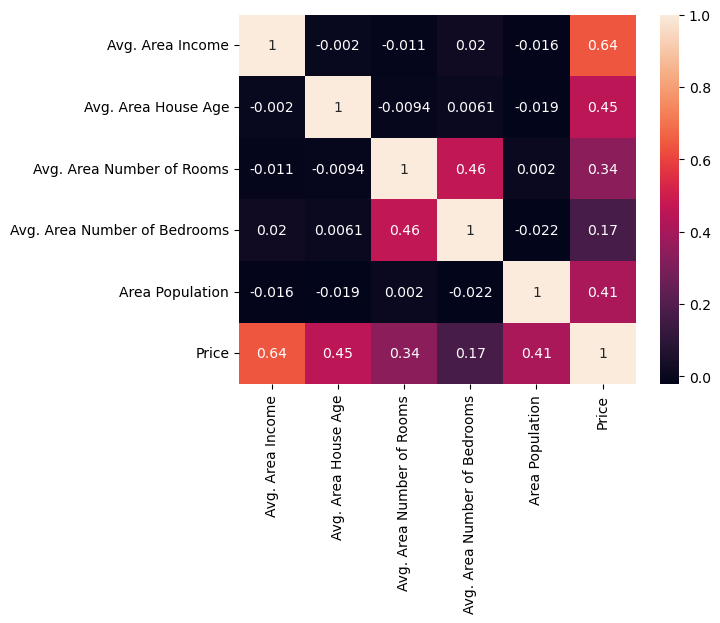

In [65]:
sns.heatmap(data.corr(), annot=True)

In [66]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [67]:
X = data.iloc[ : , 0].values
y = data.iloc[ : , -1].values

In [68]:
X = X.reshape(-1, 1)

In [69]:
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [72]:
print("x-train Shape :", X_train.shape)
print("x-test Shape :", X_test.shape)
print("y-train Shape :", y_train.shape)
print("y-test Shape :", y_test.shape)

x-train Shape : (3750, 1)
x-test Shape : (1250, 1)
y-train Shape : (3750,)
y-test Shape : (1250,)


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
modele_lineaire = LinearRegression()

In [75]:
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [76]:
y_scores_predits = modele_lineaire.predict(X_test)

In [77]:
y_scores_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991])

In [78]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ])

In [79]:
resulats = pd.DataFrame(y_test , y_scores_predits)

In [80]:
resulats

,0
1.375828e+06,1.435770e+06
1.594792e+06,1.668448e+06
1.378886e+06,1.762215e+06
1.121330e+06,1.106261e+06
1.001248e+06,1.051124e+06
...,...
9.409852e+05,7.054441e+05
1.629427e+06,1.358647e+06
1.092890e+06,9.750058e+05
1.437100e+06,1.393996e+06


In [81]:
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
print("MSE de la Regression Lineaire :", mean_squared_error(y_test, y_scores_predits))

MSE de la Regression Lineaire : 70345556190.3212


In [83]:
print("r2_score de la Regression Lineaire :", r2_score(y_test, y_scores_predits))

r2_score de la Regression Lineaire : 0.43322233931263276


In [84]:
import matplotlib.pyplot as plt

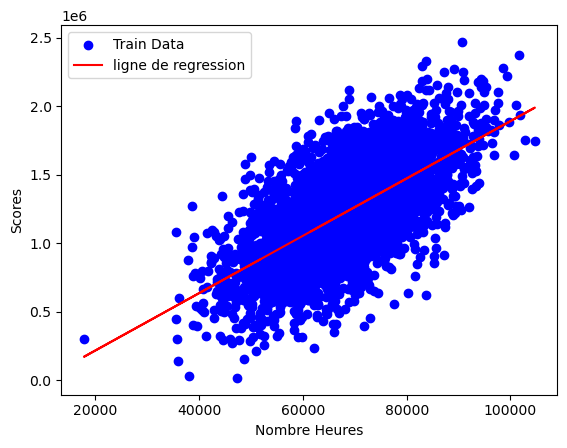

In [85]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train,modele_lineaire.predict(X_train) ,color='red', label='ligne de regression')
plt.xlabel('Nombre Heures')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [86]:
resulats = pd.DataFrame({'y-score-reel': y_test, 'y-score-predits': y_scores_predits})

In [87]:
resulats

,y-score-reel,y-score-predits
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


In [88]:
y_scores_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991])

In [89]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [90]:
print(modele_lineaire.predict([[10]]))

[-202107.54651146]
